In [21]:
# -q (quiet) 옵션은 설치 로그를 안보여줌(조용히함)
%pip install -q seaborn
# 타이타닉 데이터셋 불러오기
# (seaborn 기본 내장된 예제 데이터셋)
import seaborn as sns
import pandas as pd

# titanic 데이터 DataFrame
titanic = sns.load_dataset('titanic')

# 처음 5개 행 보기
print("타이타닉 데이터 미리보기:")
print(titanic.head())

# 데이터셋 정보 확인
print("\n데이터셋 정보:")
print(titanic.info())

# 데이터 요약 통계
print("\n데이터 요약 통계:")
print(titanic.describe())
# Col별 결측치 함계
titanic.isna().sum()
# 승객 등급 등장 빈도 (1, 2, 3 등석)
titanic['pclass'].value_counts()
# 성별 빈도 (남/녀)
titanic['sex'].value_counts()
# 생존 여부 빈도 (생존자/사망자)
titanic['survived'].value_counts()
# 성별에 따른 생존율
titanic.groupby('sex')['survived'].mean()
# 더 복잡한 통계 가능
titanic.groupby('sex').agg({'survived': ['mean']})

# 승객 등급에 따른 생존율
titanic.groupby('pclass')['survived'].mean()
# 성별 & 승객 등급에 따른 생존
titanic.groupby(['sex', 'pclass'])['survived'].mean()
# 피벗테이블
titanic.pivot_table(
    values='survived',
    index='sex',
    columns='pclass',
    aggfunc='mean'
)

# 나이 그룹별 생존율
titanic['age_group'] = pd.cut(
    titanic['age'],
    bins=[0, 12, 18, 35, 60, 100, 200],  # 초과 ~ 이하
    labels=['아동', '청소년', '청년', '중장년', '노년', '불사']
)

titanic.head()

#  obeserved 옵션 == 카테고리는 있는데, 해당되는 데이터가 없을 때 표시한다 / 안한다. 
titanic.groupby('age_group', observed=False)['survived'].mean()

# 성별 + 나이그룹으로 생존율 확인
titanic.groupby(['sex', 'age_group'])['survived'].mean()
# 피벗테이블
titanic.pivot_table(
    values='survived',
    index='sex',
    columns='age_group',
    aggfunc='mean'
)
titanic = sns.load_dataset('titanic')
# 결측치 확인
missing = titanic.isna().sum()
# 결측 있는 항목만 확인
missing[missing > 0]

# 결측 비율
missing_p = titanic.isna().mean() * 100
missing_p[missing_p > 0]
# 결측치 채우기
# age: 중요한 정보 : 평균/중앙값 대체
# embarked: 가장 많은 사람들이 탄 곳으로 대체
# deck: 추측 불가능(의믹 없음) -> 삭제

# 필요하다면, 카피떠서 진행
titanic_processed = titanic.copy()

# 비어있던 행 마스킹
age_mask = titanic['age'].isna()

# 나이 결측치 채우기 (남녀상관없이 전체평균으로 채움)
mean_age = titanic['age'].mean()
titanic_processed['age'] = titanic['age'].fillna(mean_age)

# 결측치 있는지 재확인
titanic_processed.isna().sum()

# 평균으로 채워진 값들만 확인
titanic_processed.loc[age_mask]
# 전체평균으로 대체하는게 옳을까..?
# 성별/객실별로 평균을 추정하는건?

# 모든 사람들을 성별/객실 그룹의 평균 나이로 바꾼 Series
print(titanic.groupby(['sex', 'pclass'])['age'].mean())
mean_ages = titanic.groupby(['sex', 'pclass'])['age'].transform('mean')

# titanic 의 age col 중 빈 값만, mean_ages로 채움.
titanic_processed['age'] = titanic['age'].fillna(mean_ages)

# 원래 비어있던 애들만 확인 
titanic_processed.loc[ titanic['age'].isna() ]
# embarked (탑승 도시) -> 최빈값(가장 많이 탄 곳)

# 비어있는 항구 개수
titanic['embarked'].isna().sum()

# 최빈값 (Series - 벡터)
mode_embarked = titanic['embarked'].mode()[0]  # Series 에서 1개 뽑기
# 빈 값은 최빈값으로 교체
titanic_processed['embarked'] = titanic['embarked'].fillna(mode_embarked)

# 처리 완료 확인 (빈값 0개)
titanic_processed['embarked'].isna().sum()
# deck 은 77%가 비어있음 -> 삭제
titanic['deck'].isna().mean() * 100  # 빈값 비율

# 'deck' 컬럼은 삭제  - inplace 는 실행하면, 2번째 실행 불가능
titanic_processed.drop('deck', axis=1, inplace=True)
titanic_processed.info()

Note: you may need to restart the kernel to use updated packages.
타이타닉 데이터 미리보기:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-N


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11684\3643043870.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['sex', 'age_group'])['survived'].mean()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11684\3643043870.py:62: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table(


In [22]:
# 타이타닉 데이터셋 불러오기
# (seaborn 기본 내장된 예제 데이터셋)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# titanic 데이터 DataFrame
titanic = sns.load_dataset('titanic')

# 수치 데이터에만 집중
numeric_cols = ['age', 'fare']
print("타이타닉 데이터셋 기본 정보:")
print(titanic[numeric_cols].describe())

타이타닉 데이터셋 기본 정보:
              age        fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


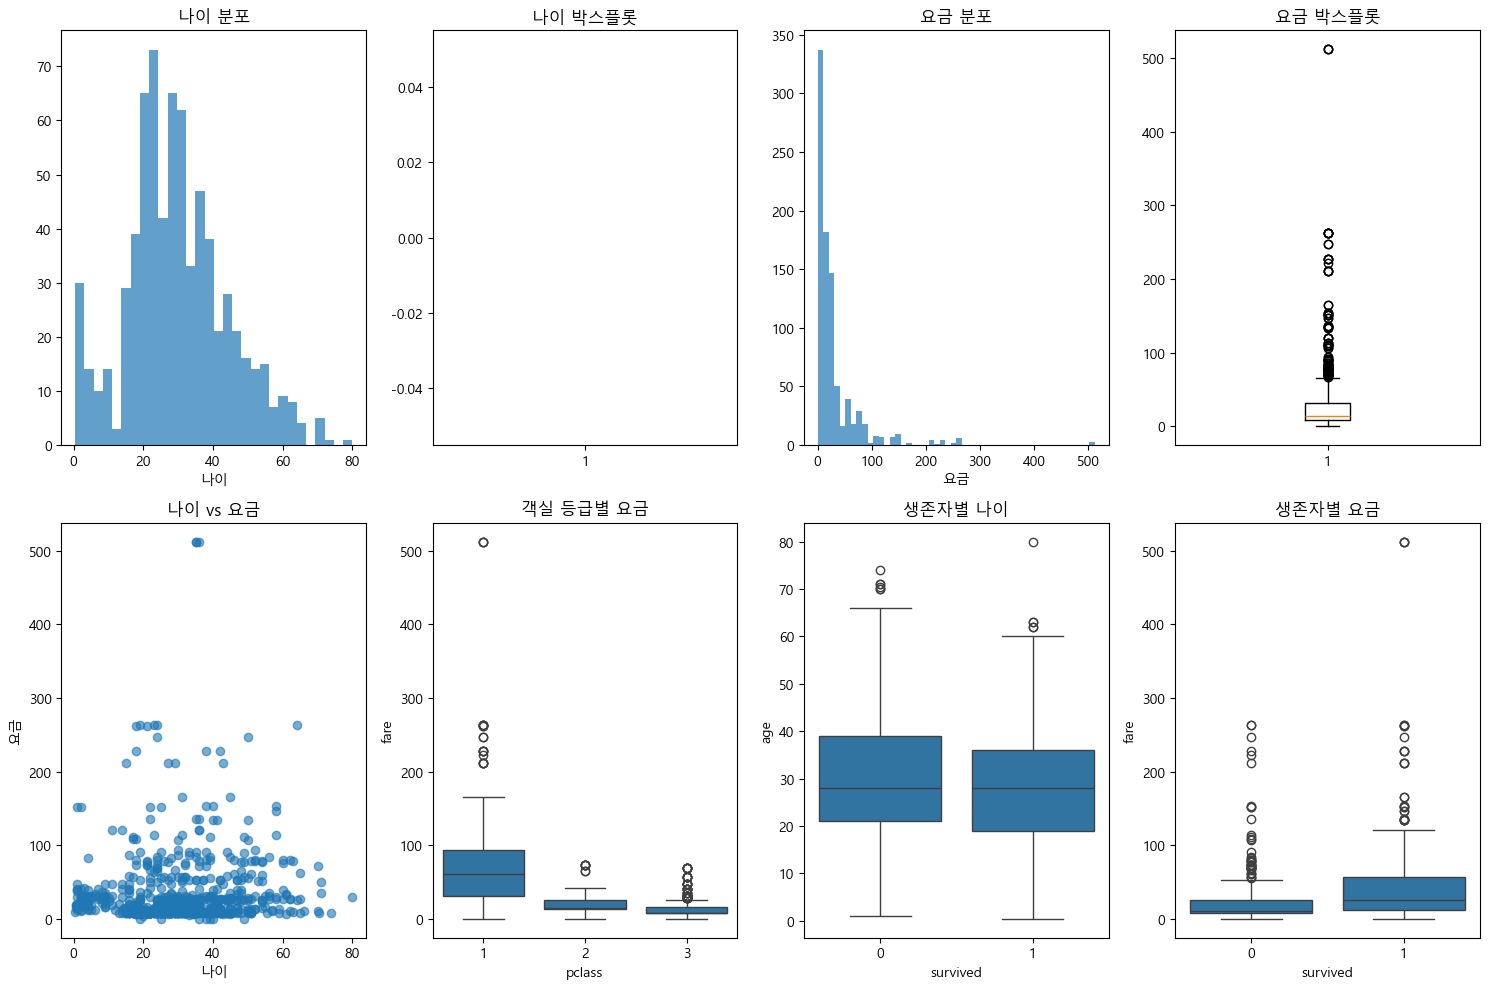

In [23]:
# 결측치(Missing Value) 처리 (이전에 배운 내용 활용)

# 성별/객실 그룹의 평균 나이로 결측치 채우기
# 결측치 처리 안하면 제대로 시각화 제대로 안나옴

# 1. 이상치 탐지 및 시각화
plt.figure(figsize=(15, 10))

# 나이 분포
plt.subplot(2, 4, 1)
plt.hist(titanic['age'], bins=30, alpha=0.7)
plt.title('나이 분포')
plt.xlabel('나이')

plt.subplot(2, 4, 2)
plt.boxplot(titanic['age'])
plt.title('나이 박스플롯')

# 요금 분포
plt.subplot(2, 4, 3)
plt.hist(titanic['fare'], bins=50, alpha=0.7)
plt.title('요금 분포')
plt.xlabel('요금')

plt.subplot(2, 4, 4)
plt.boxplot(titanic['fare'])
plt.title('요금 박스플롯')

# 산점도
plt.subplot(2, 4, 5)
plt.scatter(titanic['age'], titanic['fare'], alpha=0.6)
plt.xlabel('나이')
plt.ylabel('요금')
plt.title('나이 vs 요금')

# 객실 등급별 요금 분포
plt.subplot(2, 4, 6)
sns.boxplot(x='pclass', y='fare', data=titanic)
plt.title('객실 등급별 요금')

# 생존자별 나이 분포
plt.subplot(2, 4, 7)
sns.boxplot(x='survived', y='age', data=titanic)
plt.title('생존자별 나이')

# 생존자별 요금 분포
plt.subplot(2, 4, 8)
sns.boxplot(x='survived', y='fare', data=titanic)
plt.title('생존자별 요금')

plt.tight_layout()
plt.show()

In [24]:
numeric_cols = ['age', 'fare']
tp = titanic[numeric_cols]


=== 타이타닉 데이터 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

=== 요약 통계 ===
         survived      pclass         a

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11684\3268001851.py:116: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=['원본', '제거', '윈저화', '대체'])


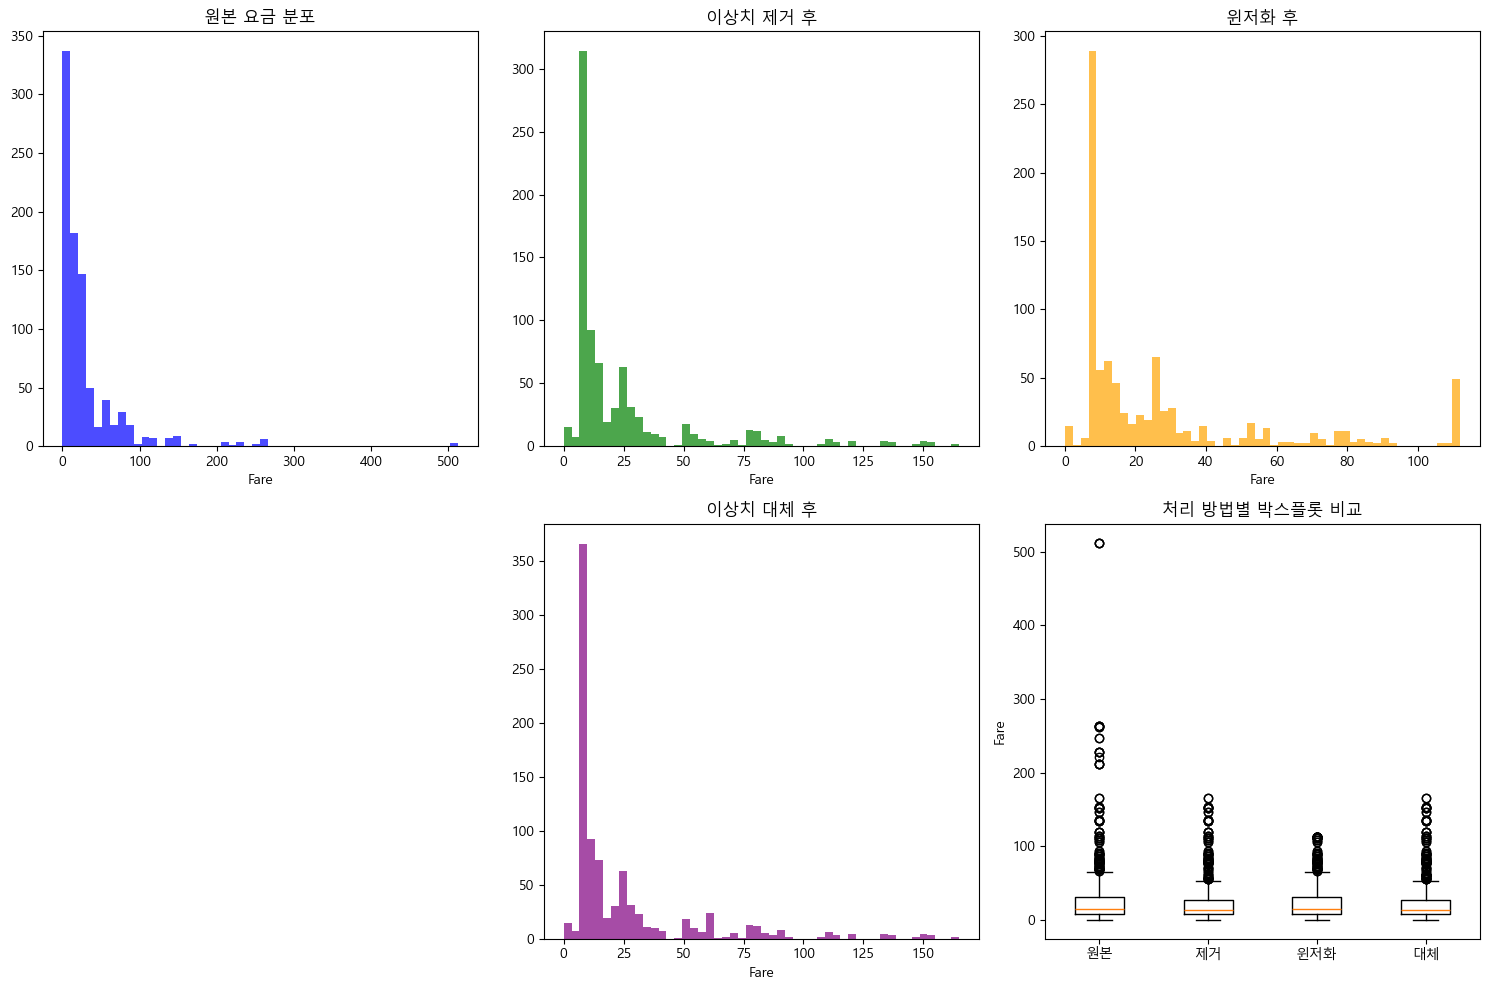


=== 이상치 처리에 따른 요금-생존 상관계수 변화 ===
                원본      제거     윈저화      대체
요금-생존 상관계수  0.2573  0.3325  0.3147  0.3443


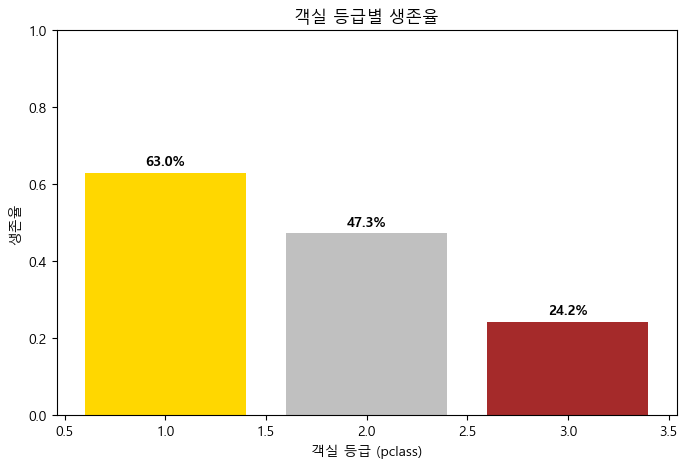

In [25]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글폰트 (윈도우)
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 로드
titanic = sns.load_dataset('titanic')

# 2. 기본 정보, 통계 출력
print("=== 타이타닉 데이터 정보 ===")
print(titanic.info())
print("\n=== 요약 통계 ===")
print(titanic.describe())

# 3. fare 이상치 탐지 (IQR 기준, 전체 데이터 기준)
Q1 = titanic['fare'].quantile(0.25)
Q3 = titanic['fare'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

fare_outliers = (titanic['fare'] < lower) | (titanic['fare'] > upper)

print(f"\n요금(fare) 이상치 비율: {fare_outliers.sum() / len(titanic) * 100:.2f}%")

# 4. 객실 등급별(fare) 이상치 탐지 함수 정의
def detect_outliers_by_group(data: pd.DataFrame, group_col: str, value_col: str) -> pd.Series:
    outliers = pd.Series(False, index=data.index)
    for group in data[group_col].unique():
        group_data = data[data[group_col] == group][value_col]
        Q1 = group_data.quantile(0.25)
        Q3 = group_data.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        group_outliers = (group_data < lower) | (group_data > upper)
        outliers[group_data.index] = group_outliers
    return outliers

fare_outliers_by_pclass = detect_outliers_by_group(titanic, 'pclass', 'fare')
print(f"\n객실 등급별 이상치 개수: {fare_outliers_by_pclass.sum()}")

# 5. 이상치 처리 방법 적용
# 5-1. 이상치 제거
titanic_removed = titanic[~fare_outliers_by_pclass].copy()

# 5-2. 윈저화 (95% 백분위수로 상한 제한)
titanic_winsorized = titanic.copy()
upper_limit = titanic['fare'].quantile(0.95)
titanic_winsorized['fare'] = titanic_winsorized['fare'].clip(upper=upper_limit)

# 5-3. 객실 등급별 중앙값으로 이상치 대체
titanic_replaced = titanic.copy()
for pclass in titanic['pclass'].unique():
    median_fare = titanic[titanic['pclass'] == pclass]['fare'].median()
    condition = fare_outliers_by_pclass & (titanic['pclass'] == pclass)
    titanic_replaced.loc[condition, 'fare'] = median_fare

# 6. 처리 결과 통계 비교 출력
methods = {
    '원본': titanic['fare'],
    '제거': titanic_removed['fare'],
    '윈저화': titanic_winsorized['fare'],
    '대체': titanic_replaced['fare']
}

comparison_stats = pd.DataFrame()
for method_name, data in methods.items():
    comparison_stats[method_name] = {
        '데이터수': len(data),
        '평균': data.mean(),
        '중앙값': data.median(),
        '표준편차': data.std(),
        '최대값': data.max()
    }

print("\n=== 이상치 처리 결과 비교 ===")
print(comparison_stats.round(2))

# 7. 처리 방법별 분포 시각화
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(titanic['fare'], bins=50, color='blue', alpha=0.7)
plt.title('원본 요금 분포')
plt.xlabel('Fare')

plt.subplot(2, 3, 2)
plt.hist(titanic_removed['fare'], bins=50, color='green', alpha=0.7)
plt.title('이상치 제거 후')
plt.xlabel('Fare')

plt.subplot(2, 3, 3)
plt.hist(titanic_winsorized['fare'], bins=50, color='orange', alpha=0.7)
plt.title('윈저화 후')
plt.xlabel('Fare')

plt.subplot(2, 3, 5)
plt.hist(titanic_replaced['fare'], bins=50, color='purple', alpha=0.7)
plt.title('이상치 대체 후')
plt.xlabel('Fare')

plt.subplot(2, 3, 6)
box_data = [
    titanic['fare'].values,
    titanic_removed['fare'].values,
    titanic_winsorized['fare'].values,
    titanic_replaced['fare'].values
]
plt.boxplot(box_data, labels=['원본', '제거', '윈저화', '대체'])
plt.title('처리 방법별 박스플롯 비교')
plt.ylabel('Fare')

plt.tight_layout()
plt.show()

# 8. 이상치 처리 전후 요금과 생존율 간 상관계수 비교
correlation_comparison = pd.DataFrame({
    '원본': [titanic['fare'].corr(titanic['survived'])],
    '제거': [titanic_removed['fare'].corr(titanic_removed['survived'])],
    '윈저화': [titanic_winsorized['fare'].corr(titanic_winsorized['survived'])],
    '대체': [titanic_replaced['fare'].corr(titanic_replaced['survived'])]
}, index=['요금-생존 상관계수'])

print("\n=== 이상치 처리에 따른 요금-생존 상관계수 변화 ===")
print(correlation_comparison.round(4))

# 9. 객실 등급별 생존율 시각화
pclass_survival = titanic.groupby('pclass')['survived'].agg(['count', 'sum', 'mean'])

plt.figure(figsize=(8,5))
colors = ['gold', 'silver', 'brown']
plt.bar(pclass_survival.index, pclass_survival['mean'], color=colors)
plt.title('객실 등급별 생존율')
plt.xlabel('객실 등급 (pclass)')
plt.ylabel('생존율')
plt.ylim(0, 1)

for idx, value in enumerate(pclass_survival['mean']):
    plt.text(idx+1, value + 0.02, f'{value:.1%}', ha='center', fontweight='bold')

plt.show()


In [26]:
# 7. 이상치 처리가 분석에 미치는 영향 확인
correlation_comparison = pd.DataFrame({
    '원본': [titanic['fare'].corr(titanic['survived'])],
    '제거': [titanic_removed['fare'].corr(titanic_removed['survived'])],
    '윈저화': [titanic_winsorized['fare'].corr(titanic_winsorized['survived'])],
    '대체': [titanic_replaced['fare'].corr(titanic_replaced['survived'])]
}, index=['요금-생존율 상관계수'])

print("\n이상치 처리가 상관관계에 미치는 영향:")
print(correlation_comparison.round(4))


이상치 처리가 상관관계에 미치는 영향:
                 원본      제거     윈저화      대체
요금-생존율 상관계수  0.2573  0.3325  0.3147  0.3443


## EDA 실습

In [27]:
# 타이타닉 데이터셋 불러오기
# (seaborn 기본 내장된 예제 데이터셋)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# titanic 데이터 DataFrame
titanic = sns.load_dataset('titanic')

 ## 분석 목표
# 1.타이타닉 승객의 생존에 영향을 준 주요 요인 파악

# 2.생존율 개선을 위한 안전 정책 수립 근거 마련

# 3.위험 그룹 식별 및 우선 구조 대상 결정

## 핵심 질문
# 1.어떤 승객 특성이 생존에 가장 큰 영향을 미쳤는가?
# 2.사회 경제적 지위가 생존에 영향을 미쳤는가?
# 3.나이/성별에 따른 생존 패턴은 어떠한가?

In [28]:
# 1. 기본 정보 파악(데이터 개요)
# 처음 5개 행 보기
print("타이타닉 데이터 미리보기:")
print(titanic.head())

# 데이터셋 정보 확인
print("\n데이터셋 정보:")
print(titanic.info())

# 데이터 요약 통계
print("\n데이터 요약 통계:")
print(titanic.describe())

# 메모링 사용량
print('\n메모리 사용량:')
print(titanic.memory_usage(deep=True).sum() / 1024 , 'mb')

타이타닉 데이터 미리보기:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0 

---생존률 기본 분석---
전체 생존률: 38.4%
생존자: 342, 사망자: 549


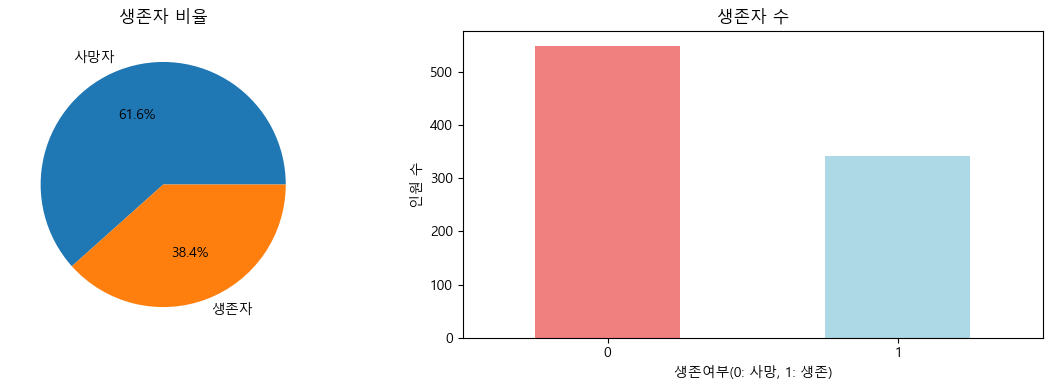

In [29]:
# 2. 생존률 기본 분석
print('---생존률 기본 분석---')
survival_rate = titanic['survived'].mean()
print(f'전체 생존률: {survival_rate:.1%}')

# 생존자/사망자 분포
dead, survivor = titanic['survived'].value_counts()
print(f'생존자: {survivor}, 사망자: {dead}')

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
a1, a2 = axes
# 사망/생존자 파이그래프
s_counts = titanic['survived'].value_counts()
a1.pie(s_counts, labels=('사망자', '생존자'), autopct='%1.1f%%')
a1.set_title('생존자 비율')

# 생존자 막대그래프
s_counts.plot(kind='bar', ax=a2, color=['lightcoral', 'lightblue'])
a2.set_title('생존자 수')
a2.set_xlabel('생존여부(0: 사망, 1: 생존)')
a2.set_ylabel('인원 수')
a2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [30]:
print("=== EDA 가설 및 우선순위 ===")
print("""
주요 가설들:
1. 여성과 어린이 우선 구조 정책 → 성별과 나이가 생존에 중요한 영향
2. 상류층 우대 구조 → 객실 등급(pclass)이 생존율과 연관
3. 가족 단위 행동 → 동반 가족 수(sibsp, parch)가 생존에 영향
4. 승선 위치 → 항구별(Embarked) 생존율 차이 가능성

분석 우선순위:
1순위: pclass, sex, age 
2순위: sibsp, parch, fare
3순위: embarked (부가 정보)
""")

=== EDA 가설 및 우선순위 ===

주요 가설들:
1. 여성과 어린이 우선 구조 정책 → 성별과 나이가 생존에 중요한 영향
2. 상류층 우대 구조 → 객실 등급(pclass)이 생존율과 연관
3. 가족 단위 행동 → 동반 가족 수(sibsp, parch)가 생존에 영향
4. 승선 위치 → 항구별(Embarked) 생존율 차이 가능성

분석 우선순위:
1순위: pclass, sex, age 
2순위: sibsp, parch, fare
3순위: embarked (부가 정보)



=== 객실 등급별 생존율 ===
1 등급: 63.0% - 136 / 216명
2 등급: 47.3% - 87 / 184명
3 등급: 24.2% - 119 / 491명
=== 성별 생존율 ===
female: 74.2% - 233 / 314명
male: 18.9% - 109 / 577명
=== 연령대별 생존율 ===
아동(-12): 58.0% - 40/69명
청소년(13-18): 42.9% - 30/70명
청년(19-35): 38.3% - 137/358명
중장년(36-60): 40.0% - 78/195명
노년(61+): 22.7% - 5/22명
=== 성별 x 객실등급 교차분석 ===
pclass     1     2     3
sex                     
female  96.8  92.1  50.0
male    36.9  15.7  13.5


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11684\766150191.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = titanic.groupby('age_group')['survived'].agg(['count', 'sum', 'mean']).dropna()


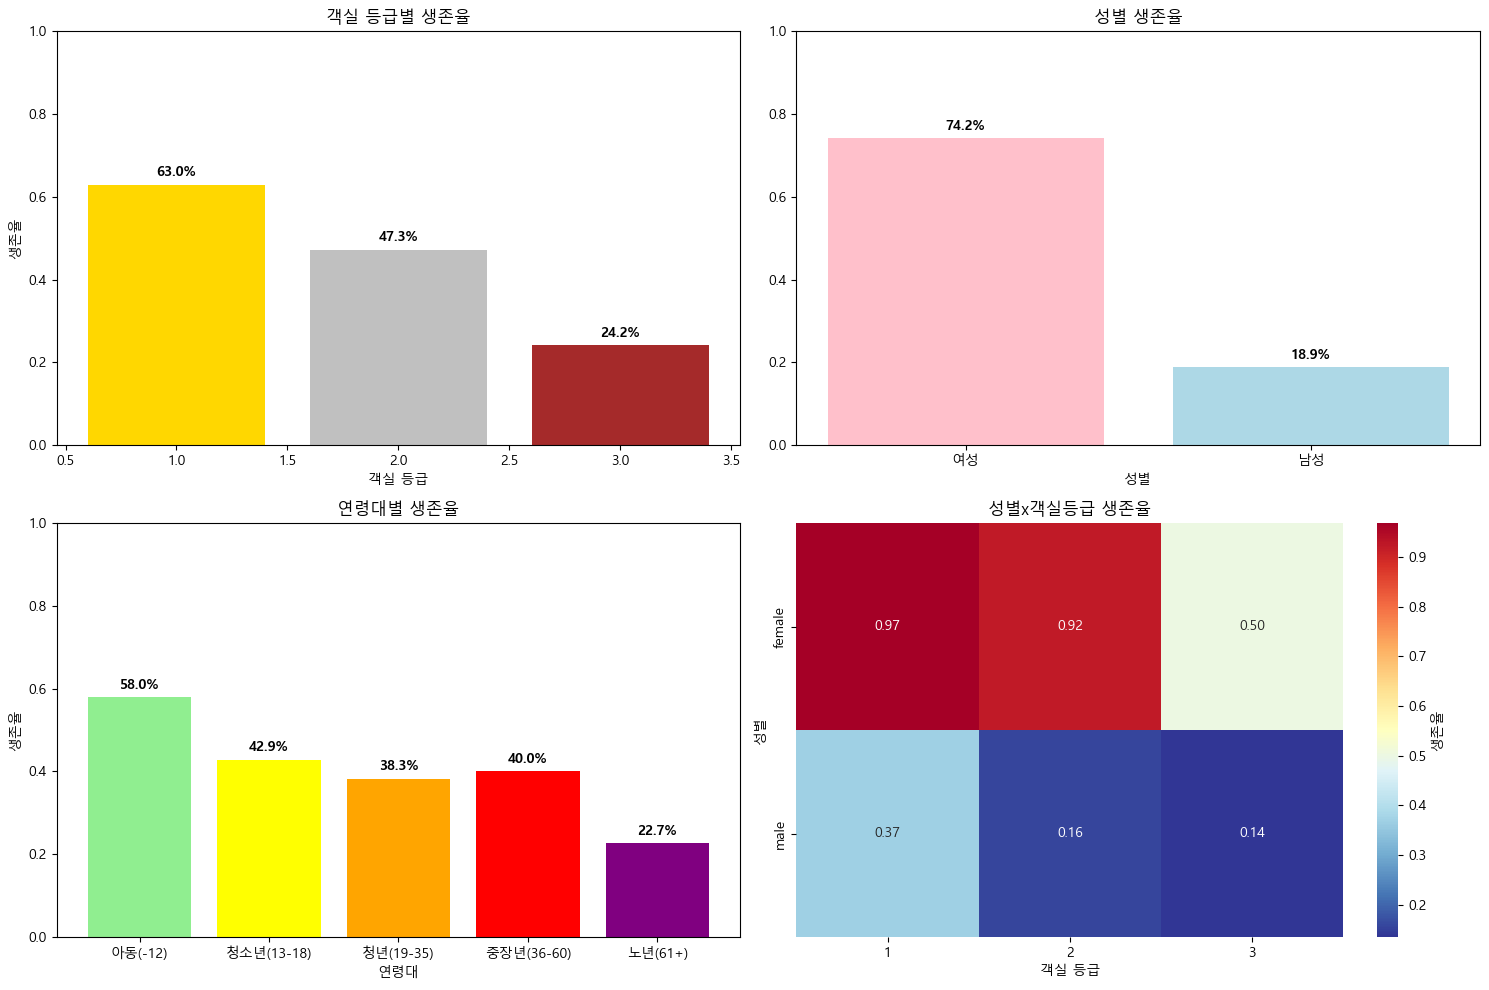

In [31]:
# 필요하다면, 결측치/이상치를 처리 한다.
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
a1, a2, a3, a4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]

# 핵심 변수별 생존률 분석
# 1. 객실 등급별 생존률 (총원, 생존, 생존률)
pclass_survival = titanic.groupby('pclass')['survived'].agg(['count', 'sum', 'mean'])

a1.bar(pclass_survival.index, pclass_survival['mean'], color=['gold', 'silver', 'brown'])
a1.set_title('객실 등급별 생존율')
a1.set_xlabel('객실 등급')
a1.set_ylabel('생존율')
a1.set_ylim(0, 1)

for idx, value in enumerate(pclass_survival['mean']):
    #       x좌표,   y좌표
    a1.text(idx+1, value + 0.02, f'{value:.1%}', ha='center', fontweight='bold')

print('=== 객실 등급별 생존율 ===')
for idx, row in pclass_survival.iterrows():
    print(f'{idx} 등급: {row['mean']:.1%} - {row['sum'].astype(int)} / {row['count'].astype(int)}명')


# 1-1. 요금으로 insight를 뽑을 수 있을까? (돈을 특히 많이 낸 사람들의 생존률..?)

# 2. 성별 생존률
sex_survival = titanic.groupby('sex')['survived'].agg(['count', 'sum', 'mean'])
a2.bar(range(len(sex_survival)), sex_survival['mean'], color=['pink', 'lightblue'])
a2.set_title('성별 생존율')
a2.set_xlabel('성별')
a2.set_xticklabels(['여성', '남성'])
a2.set_xticks(range(len(sex_survival)))
a2.set_ylim(0, 1)

for idx, value in enumerate(sex_survival['mean']):
    a2.text(idx, value + 0.02, f'{value:.1%}', ha='center', fontweight='bold')

print('=== 성별 생존율 ===')
for idx, row in sex_survival.iterrows():
    print(f'{idx}: {row['mean']:.1%} - {row['sum'].astype(int)} / {row['count'].astype(int)}명')


# 3. 나이 생존률(연령대 별)
titanic['age_group'] = pd.cut(
    titanic['age'],
    bins=[0, 12, 18, 35, 60, 100,],  # 초과 ~ 이하
    labels=['아동(-12)', '청소년(13-18)', '청년(19-35)', '중장년(36-60)', '노년(61+)',]
)
age_survival = titanic.groupby('age_group')['survived'].agg(['count', 'sum', 'mean']).dropna()

a3.bar(range(len(age_survival)), age_survival['mean'], 
       color=['lightgreen', 'yellow', 'orange', 'red', 'purple'])
a3.set_title('연령대별 생존율')
a3.set_xlabel('연령대')
a3.set_xticks(range(len(age_survival)))
a3.set_xticklabels(age_survival.index)
a3.set_ylim(0, 1)
a3.set_ylabel('생존율')

for idx, value in enumerate(age_survival['mean']):
    a3.text(idx, value + 0.02, f'{value:.1%}', ha='center', fontweight='bold')

print('=== 연령대별 생존율 ===')
for idx, row in age_survival.iterrows():
    print(f'{idx}: {row['mean']:.1%} - {row['sum'].astype(int)}/{row['count'].astype(int)}명')


# 4. 조합 분석: 성별 x 객실등급 -> GroupBy 말고 Crosstab 으로 해보자
#               성별       x         객실등급 ,       생존              율
survival_ct = pd.crosstab(titanic['sex'], titanic['pclass'], titanic['survived'], aggfunc='mean')
sns.heatmap(survival_ct, annot=True, fmt='.2f', cmap='RdYlBu_r',
            ax=a4, cbar_kws={'label': '생존율'})
a4.set_title('성별x객실등급 생존율')
a4.set_xlabel('객실 등급')
a4.set_ylabel('성별')

print('=== 성별 x 객실등급 교차분석 ===')
print(survival_ct.round(3) * 100)

plt.tight_layout()
plt.show()

In [32]:
%pip install -q scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from scipy.stats import chi2_contingency

# 카이제곱 독립성 검정
sex_survival_ct = pd.crosstab(titanic['sex'], titanic['survived'])
chi2, p_value, dof, expected = chi2_contingency(sex_survival_ct)
'''
chi2 = 카이제곱 통계량
p_value = 유의 확률 (값이 작다 -> 관련이 있다)
- 일반적으로 p_value 가 5%(0.05) 보다 작으면 연관이 있다고 봄

dof = 자유도 (degree of freedom)
exepected = 기대빈도표 (성별-생존이 독립적일때 기대되는 값들)
'''
print(p_value)
if p_value < 0.05:
    print('성별-생존율은 관련 있음')
else:
    print('성별-생존율 관련 없음')

1.1973570627755645e-58
성별-생존율은 관련 있음


In [34]:
# 5. 분석 결과 보고 (인사이트 정리)
print("""
## 1. 주요 가설

* **가설 1**: 여성과 아동이 우선 구조되었을 것이다.
* **가설 2**: 상류층(1등급)이 구조에서 우대받았을 것이다.

---

## 2. 데이터 요약

### 객실 등급별 생존율

* 1등급: 63.0% (136/216)
* 2등급: 47.3% (87/184)
* 3등급: 24.2% (119/491)

→ 등급이 높을수록 생존율이 높음

### 성별 생존율

* 여성: 74.2% (233/314)
* 남성: 18.9% (109/577)

→ 여성 생존율이 남성보다 약 4배 높음

### 연령대별 생존율

* 아동(-12): 58.0%
* 청소년(13-18): 42.9%
* 청년(19-35): 38.3%
* 중장년(36-60): 40.0%
* 노년(61+): 22.7%

→ 아동 생존율이 가장 높고, 고령층으로 갈수록 낮아짐

### 성별 x 객실 등급 생존율 (%)

| 성별 | 1등급   | 2등급   | 3등급   |
| -- | ----- | ----- | ----- |
| 여성 | 96.8% | 92.1% | 50.0% |
| 남성 | 36.9% | 15.7% | 13.5% |

→ 모든 등급에서 여성 생존율이 높음
→ 특히 1등급 여성은 거의 전원 구조

---

## 3. 가설 검정 결과

✅ **가설 1 채택**: 여성과 아동이 실제로 높은 생존율을 보였으며, 우선 구조된 것으로 해석 가능

✅ **가설 2 채택**: 객실 등급이 높을수록 생존율이 뚜렷하게 높아, 상류층 우선 구조가 있었던 것으로 판단

---

## 4. 결론

* 생존은 **성별, 나이, 객실 등급**에 따라 유의미한 차이를 보임
* **여성, 아동, 상류층**이 구조에 있어 우선순위를 가졌음
* 구조 우선 정책과 사회 계층 간 격차가 생존 결과에 강하게 반영됨
""")


## 1. 주요 가설

* **가설 1**: 여성과 아동이 우선 구조되었을 것이다.
* **가설 2**: 상류층(1등급)이 구조에서 우대받았을 것이다.

---

## 2. 데이터 요약

### 객실 등급별 생존율

* 1등급: 63.0% (136/216)
* 2등급: 47.3% (87/184)
* 3등급: 24.2% (119/491)

→ 등급이 높을수록 생존율이 높음

### 성별 생존율

* 여성: 74.2% (233/314)
* 남성: 18.9% (109/577)

→ 여성 생존율이 남성보다 약 4배 높음

### 연령대별 생존율

* 아동(-12): 58.0%
* 청소년(13-18): 42.9%
* 청년(19-35): 38.3%
* 중장년(36-60): 40.0%
* 노년(61+): 22.7%

→ 아동 생존율이 가장 높고, 고령층으로 갈수록 낮아짐

### 성별 x 객실 등급 생존율 (%)

| 성별 | 1등급   | 2등급   | 3등급   |
| -- | ----- | ----- | ----- |
| 여성 | 96.8% | 92.1% | 50.0% |
| 남성 | 36.9% | 15.7% | 13.5% |

→ 모든 등급에서 여성 생존율이 높음
→ 특히 1등급 여성은 거의 전원 구조

---

## 3. 가설 검정 결과

✅ **가설 1 채택**: 여성과 아동이 실제로 높은 생존율을 보였으며, 우선 구조된 것으로 해석 가능

✅ **가설 2 채택**: 객실 등급이 높을수록 생존율이 뚜렷하게 높아, 상류층 우선 구조가 있었던 것으로 판단

---

## 4. 결론

* 생존은 **성별, 나이, 객실 등급**에 따라 유의미한 차이를 보임
* **여성, 아동, 상류층**이 구조에 있어 우선순위를 가졌음
* 구조 우선 정책과 사회 계층 간 격차가 생존 결과에 강하게 반영됨

